# Advertising Daten zu einer Website und App

In diesem Projekt werden wir mit Fake-Daten zu Werbung arbeiten, die aufzeigen, ob ein Nutzer auf eine Werbeanzeige auf einer Webseite einer Firma geklickt hat oder nicht. Wir werden versuchen ein Modell zu erstellen, das anhand von Nutzereigenschaften vorhersagt, ob dieser auf die Werbung klicken wird oder nicht.

Der Datensatz beinhaltet folgende Eigenschaften:

* 'Daily Time Spent on Site': Zeit auf der Webseite in Minuten
* 'Age': Alter in Jahren
* 'Area Income': Durchschnittliches Einkommen der Region des Nutzers
* 'Daily Internet Usage': Durchschnittliche Minutenzahl die der Nutzer täglich im Internet ist
* 'Ad Topic Line': Überschrift der Werbung
* 'City': Stadt des Nutzers
* 'Male': Ob der Nutzer männlich ist (1) oder nicht (0)
* 'Country': Land des Nutzers
* 'Timestamp': Zeit zu der der Nutzer auf die Werbung geklickt oder das Fenster geschlossen hat
* 'Clicked on Ad': Ob der Nutzer gelickt hat (1) oder nicht (0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#csv datei lesen
ad_data = pd.read_csv('Advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


(array([12.,  6., 32., 21., 27., 70., 48., 87., 60., 38., 82., 39., 86.,
        37., 30., 68., 26., 44., 30., 18., 29., 18., 32., 15., 10., 16.,
         2., 10.,  2.,  5.]),
 array([19. , 20.4, 21.8, 23.2, 24.6, 26. , 27.4, 28.8, 30.2, 31.6, 33. ,
        34.4, 35.8, 37.2, 38.6, 40. , 41.4, 42.8, 44.2, 45.6, 47. , 48.4,
        49.8, 51.2, 52.6, 54. , 55.4, 56.8, 58.2, 59.6, 61. ]),
 <BarContainer object of 30 artists>)

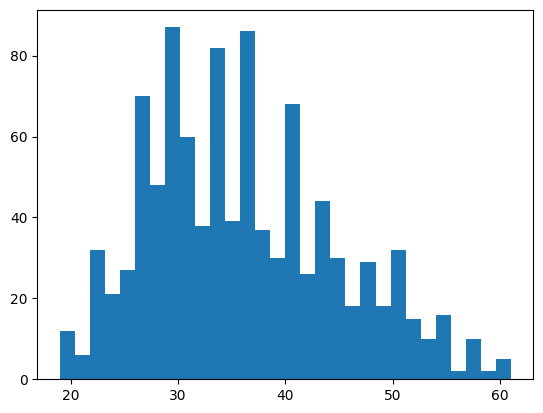

In [8]:
plt.hist(ad_data['Age'], bins=30)

In [15]:
sns.set_palette("colorblind")
sns.set_style("whitegrid")

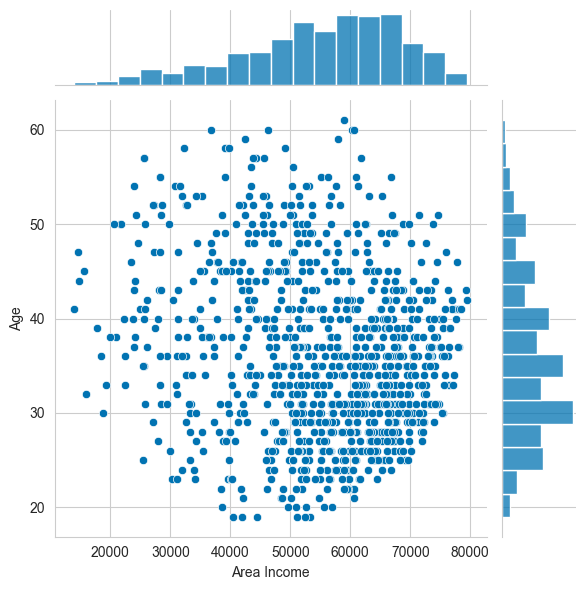

In [16]:
sns.jointplot(x='Area Income',y='Age',data=ad_data)

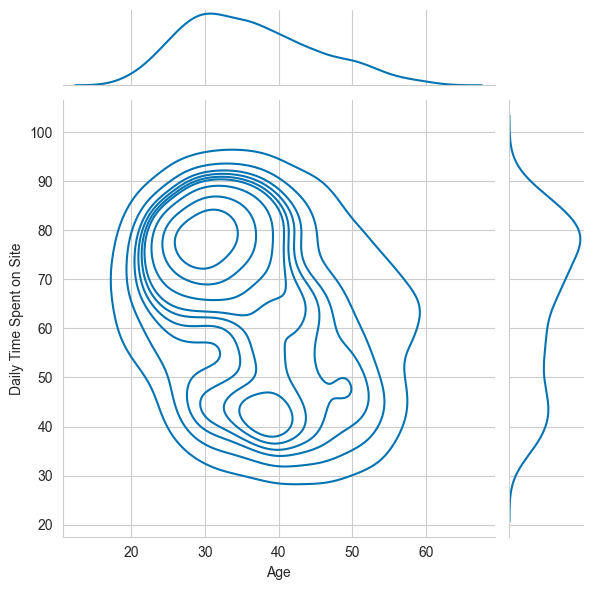

In [19]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde')

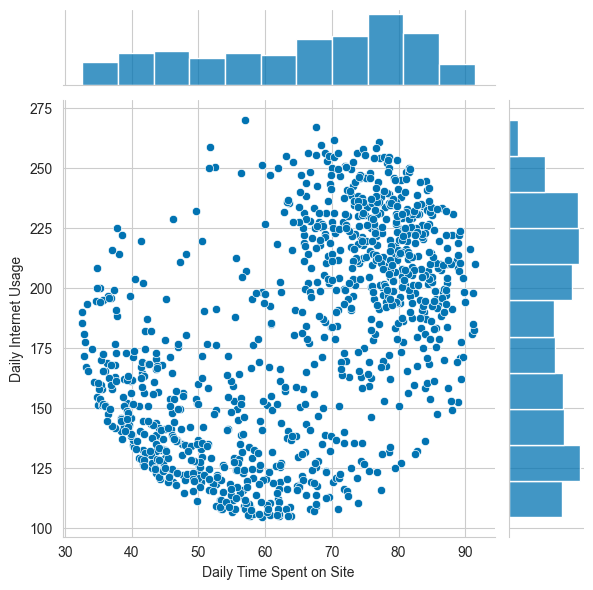

In [21]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data)

**Und zum Schluss erstelle noch ein Pairplot mit "Clicked on Ad" als Hue.**

c:\Users\fzent\Documents\1_Software\Machine_Learning_Kurs\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


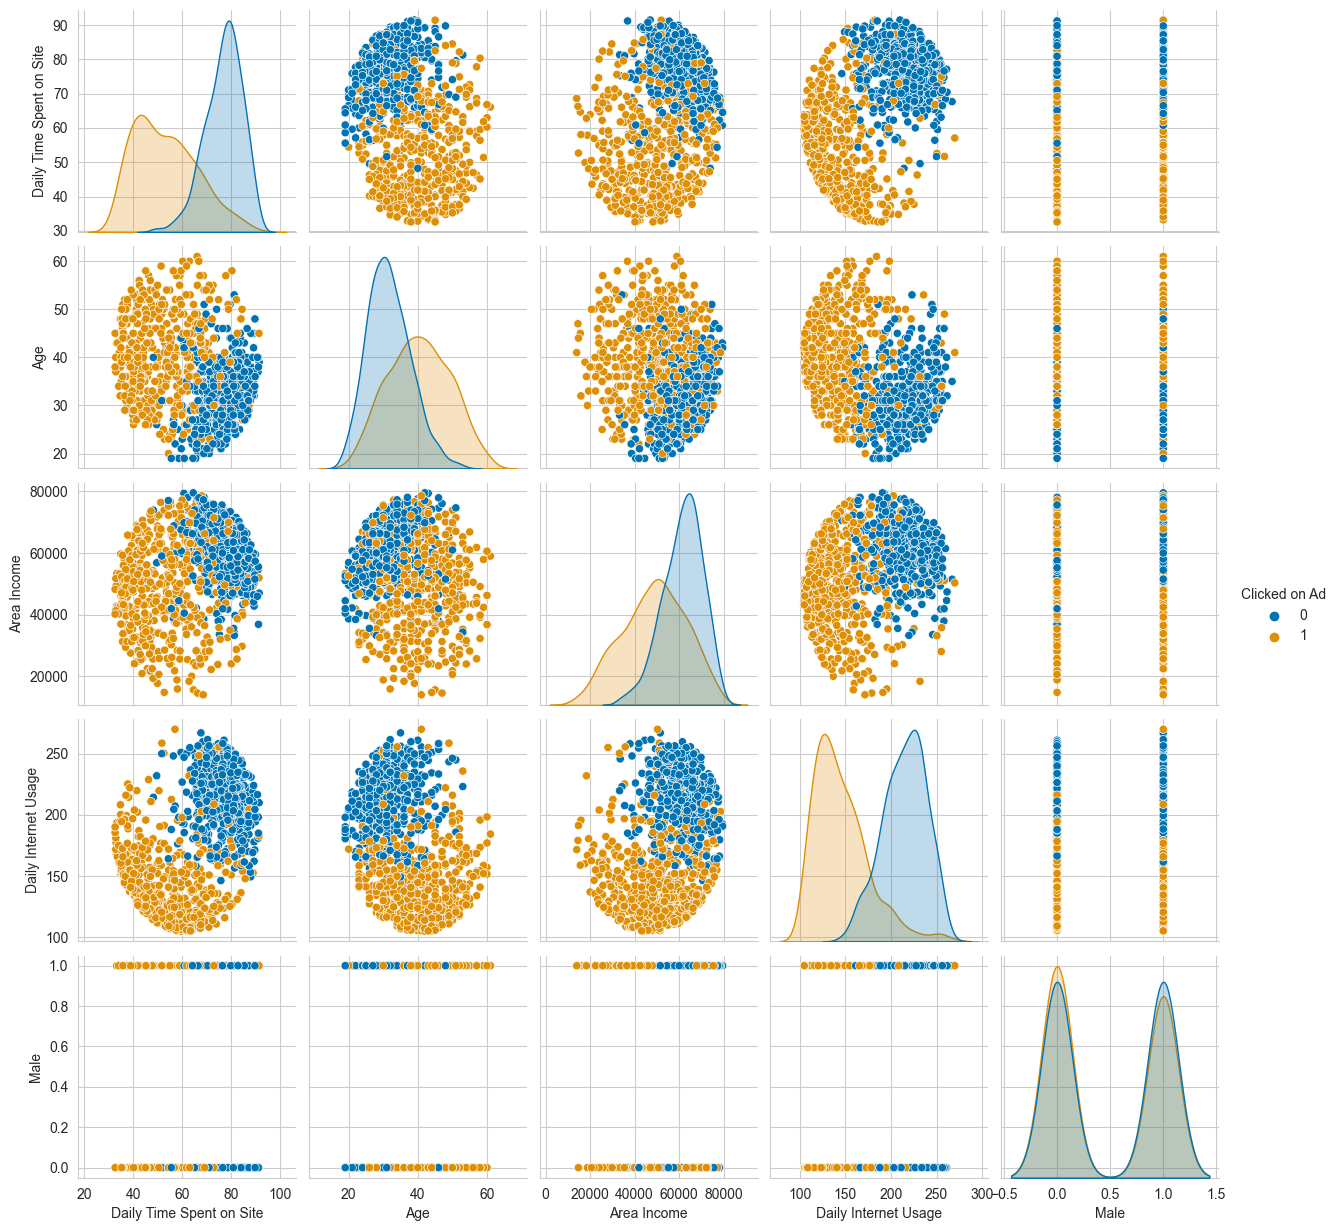

In [22]:
sns.pairplot(ad_data,hue='Clicked on Ad')

In [28]:
ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

In [36]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1),ad_data['Clicked on Ad'], test_size=0.33, random_state=69)

In [37]:
#logistisches regressionsmodell trainieren und fitten
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [39]:
#prediction
y_pred = logmodel.predict(X_test)

In [40]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

